# LSE DA201 - Assignment  2 - Covid-19 in the UK data analysis Project

## Required: Report submission

### Github Repositoriy
- Link to my Github repository: https://github.com/DR2-env/LSE-course-2-assignment-UK-Covid-analysis

In [1]:
### Screenshot of my Github repository


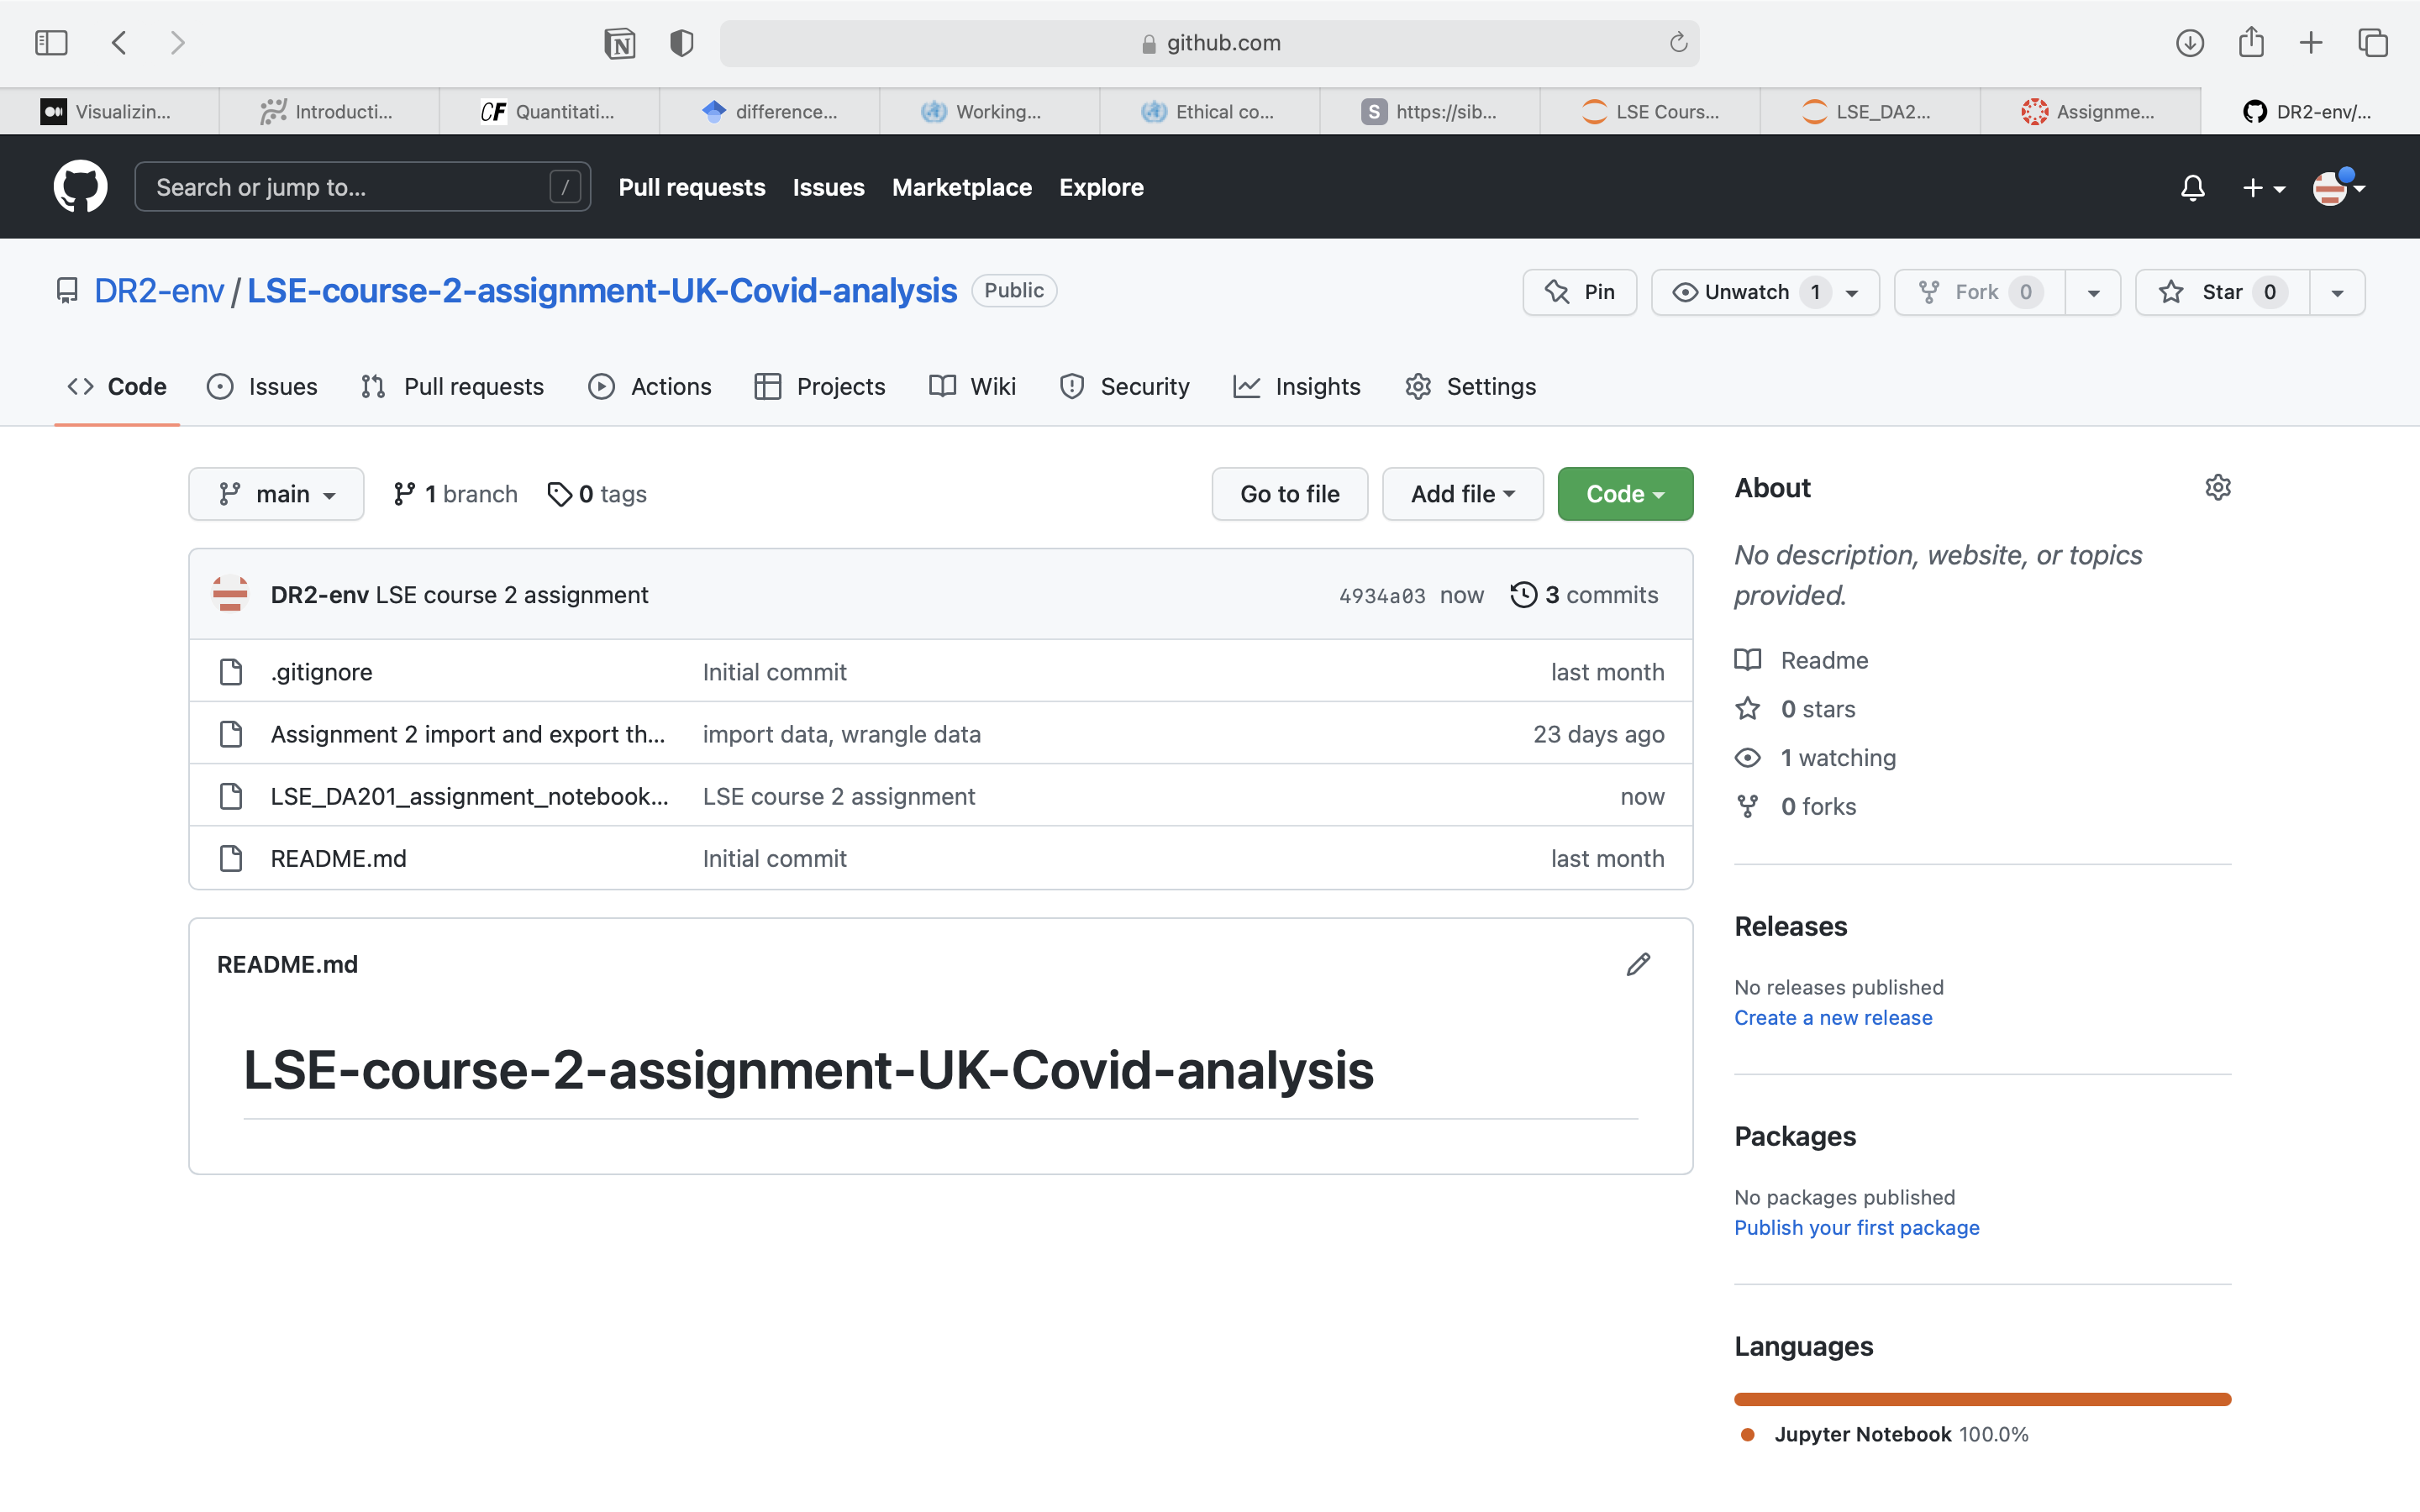

## Assignment activity 1 - Importing and exploring the data

In [15]:
# Import data and packages

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns 

data_cases = pd.read_csv('covid_19_uk_cases.csv')

data_vacci = pd.read_csv('covid_19_uk_vaccinated.csv')


# Create a data frame for vaccine and covid cases

cases = pd.DataFrame(data_cases)

vacci = pd.DataFrame(data_vacci)



### View the data frame

In [3]:
# View the data frame for cases

cases.head() 

cases.tail()

cases.shape 
# Data frame made of 7584 rows and 12 columns

cases.dtypes 
# Province, country, ISO, subregion, date are objects

cases.isnull().sum() 
#checking for the number of missing data


cases_na = cases[cases.isna().any(axis=1)] 
# Create a variable with the NANs


cases_na.head() 
# ID 875 and 876 have missing values, located in the Bermuda


,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
875,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-21,NaN,NaN,NaN,NaN
876,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-22,NaN,NaN,NaN,NaN


In [4]:
# Preview the data frame for vaccinated

vacci.head()

vacci.tail()

vacci.shape 
# Data frame has 7584 rows and 11 columns

vacci.dtypes 


vacci.isnull().sum() 
# No missing values found

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Vaccinated                  0
First Dose                  0
Second Dose                 0
dtype: int64

### Subsetting the data

In [6]:
# Filter for Gibraltar state

Gibraltar_cases = cases[cases['Province/State'] == 'Gibraltar']

Gibraltar_cases.shape 
# subset made of 632 rows and 12 columns

Gibraltar_cases.head()

pd.set_option("display.max_rows", None)

Gibraltar_cases.shape 

(632, 12)

In [7]:
# Subset the data to contain Deaths, cases, recoverd, Hospitalised

Gibraltar_cases_subset = Gibraltar_cases[['Deaths','Cases','Recovered','Hospitalised']]



In [8]:
# Run descriptive statistics

Gibraltar_cases_subset.describe()

,Deaths,Cases,Recovered,Hospitalised
count,632.000000,632.000000,632.000000,632.000000
mean,40.208861,2237.109177,1512.821203,1027.625000
std,45.332832,2136.268090,1817.096755,1145.681058
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,177.000000,109.500000,157.750000
50%,5.000000,1036.500000,323.500000,675.500000
75%,94.000000,4286.000000,4122.500000,1548.000000
max,97.000000,5727.000000,4670.000000,4907.000000


## Assignment Activity 2 - Merge and analyse the data

In [10]:
# Show date types for cases
cases.head() 
cases.dtypes

Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Deaths                      float64
Cases                       float64
Recovered                   float64
Hospitalised                float64
dtype: object

In [11]:
# Show data types for vaccines
vacci.head()
vacci.dtypes

Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Vaccinated                    int64
First Dose                    int64
Second Dose                   int64
dtype: object

In [12]:
# Merge the datasets using Dates as a Key

# left join union
Vacci_cases = pd.merge(vacci, cases, how = 'left', on = ['Date', 'Province/State', 'Country/Region'])

Vacci_cases.head()
print(Vacci_cases.shape) 
# 7854 rows and 20 columns 

Vacci_cases.dtypes

(7584, 20)


Province/State                 object
Country/Region                 object
Lat_x                         float64
Long_x                        float64
ISO 3166-1 Alpha 3-Codes_x     object
Sub-region Name_x              object
Intermediate Region Code_x      int64
Date                           object
Vaccinated                      int64
First Dose                      int64
Second Dose                     int64
Lat_y                         float64
Long_y                        float64
ISO 3166-1 Alpha 3-Codes_y     object
Sub-region Name_y              object
Intermediate Region Code_y      int64
Deaths                        float64
Cases                         float64
Recovered                     float64
Hospitalised                  float64
dtype: object

In [13]:
# Dropping irrelevant columns

Vacci_cases = Vacci_cases.drop(columns = ['Lat_x', 'Long_x','ISO 3166-1 Alpha 3-Codes_x', 'Sub-region Name_x',
                                         'Intermediate Region Code_x', 'Lat_y', 'Long_y','ISO 3166-1 Alpha 3-Codes_y',
                                          'Sub-region Name_y', 'Intermediate Region Code_y'])



In [14]:
# View the data set

print(Vacci_cases.shape)
print(Vacci_cases.dtypes)
print(Vacci_cases.isna().sum())
Vacci_cases.head()
Vacci_cases.describe()


(7584, 10)
Province/State     object
Country/Region     object
Date               object
Vaccinated          int64
First Dose          int64
Second Dose         int64
Deaths            float64
Cases             float64
Recovered         float64
Hospitalised      float64
dtype: object
Province/State    0
Country/Region    0
Date              0
Vaccinated        0
First Dose        0
Second Dose       0
Deaths            2
Cases             2
Recovered         2
Hospitalised      2
dtype: int64


,Vaccinated,First Dose,Second Dose,Deaths,Cases,Recovered,Hospitalised
count,7584.000000,7584.000000,7584.000000,7582.000000,7.582000e+03,7582.000000,7582.000000
mean,5913.547600,6192.822257,5913.547600,6210.202321,2.147082e+05,454.691242,685.228568
std,10846.410258,11439.883647,10846.410258,24860.790148,1.007557e+06,1010.642337,819.256635
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.200000e+01,0.000000,105.000000
50%,0.000000,0.000000,0.000000,1.000000,1.685000e+02,13.000000,390.000000
75%,8338.000000,7505.500000,8338.000000,25.000000,1.585000e+03,312.000000,955.750000
max,69619.000000,94038.000000,69619.000000,138237.000000,8.317439e+06,8322.000000,4907.000000


#### Observation: 
The values given in the cases column are exponenetially higher than the onese in the recovered and 
Hospitalised column. Some province must influence these unusual numbers.

### Change Date from object type to DateTime

In [16]:
# Use datetime function

Vacci_cases['Date'] = pd.to_datetime(Vacci_cases['Date'])

# Verify if the changes have been made correctly
print(Vacci_cases.dtypes)
Vacci_cases.tail()

Province/State            object
Country/Region            object
Date              datetime64[ns]
Vaccinated                 int64
First Dose                 int64
Second Dose                int64
Deaths                   float64
Cases                    float64
Recovered                float64
Hospitalised             float64
dtype: object


,Province/State,Country/Region,Date,Vaccinated,First Dose,Second Dose,Deaths,Cases,Recovered,Hospitalised
7579,Others,United Kingdom,2021-10-10,1070,1216,1070,137735.0,8154306.0,0.0,378.0
7580,Others,United Kingdom,2021-10-11,1300,1604,1300,137763.0,8193769.0,0.0,386.0
7581,Others,United Kingdom,2021-10-12,1482,2027,1482,137944.0,8231437.0,0.0,386.0
7582,Others,United Kingdom,2021-10-13,0,0,0,138080.0,8272883.0,0.0,0.0
7583,Others,United Kingdom,2021-10-14,0,0,0,138237.0,8317439.0,0.0,0.0


### Question 1 - Determine the number of vaccinated people accross the states and regions

In [14]:
# Use a combination of groupby and aggregate function

Vacci_cases.groupby(['Province/State'])[['First Dose', 'Second Dose']].aggregate('sum')\
.sort_values(['First Dose', 'Second Dose'], ascending = False)



,First Dose,Second Dose
Province/State,,
Gibraltar,5870786,5606041
Montserrat,5401128,5157560
British Virgin Islands,5166303,4933315
Anguilla,4931470,4709072
Isle of Man,4226984,4036345
Falkland Islands (Malvinas),3757307,3587869
Cayman Islands,3522476,3363624
Channel Islands,3287646,3139385
Turks and Caicos Islands,3052822,2915136


#### Observation: 
Gibraltar has the highest number of First Dose and Second Dose and Saint Helena, Ascension and Tristan da Cunha
the least.

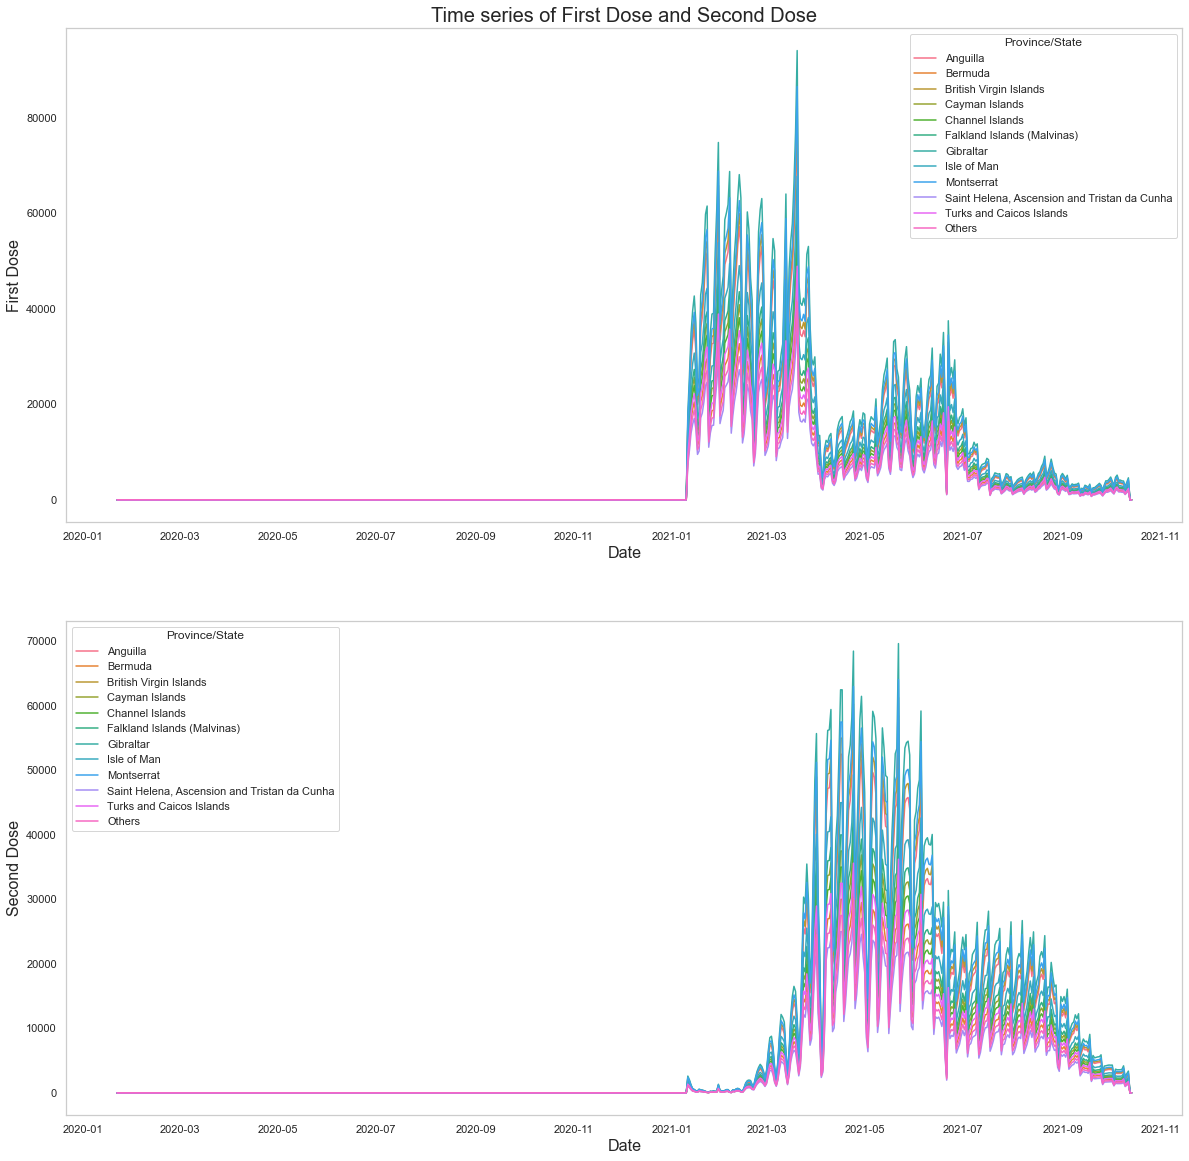

In [44]:
# Plot line chart to display first & second dose

# Set figure size and rows

fig, axs = plt.subplots(nrows = 2, figsize = (20,20))

# Save plots as variables

a = sns.lineplot(data = Vacci_cases, x = 'Date', y = 'First Dose', hue = 'Province/State', ax=axs[0])
b = sns.lineplot(data = Vacci_cases, x = 'Date', y = 'Second Dose', hue = 'Province/State', ax=axs[1])

# Edits charts for each variable
a.set_xlabel('Date', fontsize=16)
a.set_ylabel('First Dose', fontsize=16)
b.set_xlabel('Date', fontsize=16)
b.set_ylabel('Second Dose', fontsize=16)

a.grid(visible = None)
b.grid(visible = None)
a.set_title('Time series of First Dose and Second Dose', fontsize=20)

# Save the charts as image
fig.savefig('first_second_dose.png', dpi=400)

#### Observation:
It is interesting to see that First Dose and Second Dose administerd follows the same 
increasing and decreasing pattern for each state and regions. 

It can also be seen that there is 2-3 months time delay between the uptake of the first dose and the second dose.

### Question 2 - which state has the highest number of individuals who have received first dose but not second dose

In [49]:
# Preview the dataset
Vacci_cases.head()

# create new column 
Vacci_cases['Partially vaccinated'] = Vacci_cases['First Dose'] - Vacci_cases['Second Dose']

Vacci_cases.head()

# create new variable
first_dose_only = Vacci_cases.groupby(['Province/State'])[['Partially vaccinated']].aggregate('sum')\
.sort_values(['Partially vaccinated'], ascending = False)

first_dose_only


,Partially vaccinated
Province/State,
Gibraltar,264745
Montserrat,243568
British Virgin Islands,232988
Anguilla,222398
Isle of Man,190639
Falkland Islands (Malvinas),169438
Cayman Islands,158852
Channel Islands,148261
Turks and Caicos Islands,137686


### Question 3 percentage of individuals who have received a first dose but not second dose

In [51]:
# Use a combination of groupby and aggregate function
db = Vacci_cases.groupby(['Province/State'])[['Vaccinated','First Dose', 'Second Dose', 'Partially vaccinated']]\
.aggregate('sum').sort_values(['Vaccinated','First Dose', 'Second Dose','Partially vaccinated'], ascending = True)

# Creat new column
db['percentage of first dose only'] = db['Partially vaccinated']/(db['First Dose']+ db['Second Dose'])
db.sort_values(['percentage of first dose only'], ascending = False)

,Vaccinated,First Dose,Second Dose,Partially vaccinated,percentage of first dose only
Province/State,,,,,
Turks and Caicos Islands,2915136,3052822,2915136,137686,0.023071
Isle of Man,4036345,4226984,4036345,190639,0.023070
Anguilla,4709072,4931470,4709072,222398,0.023069
British Virgin Islands,4933315,5166303,4933315,232988,0.023069
Cayman Islands,3363624,3522476,3363624,158852,0.023069
Channel Islands,3139385,3287646,3139385,148261,0.023068
Montserrat,5157560,5401128,5157560,243568,0.023068
Falkland Islands (Malvinas),3587869,3757307,3587869,169438,0.023068
Gibraltar,5606041,5870786,5606041,264745,0.023068


#### Observation:
Only ~20% of each the population of each province/state has not received the second dose of the vaccine.

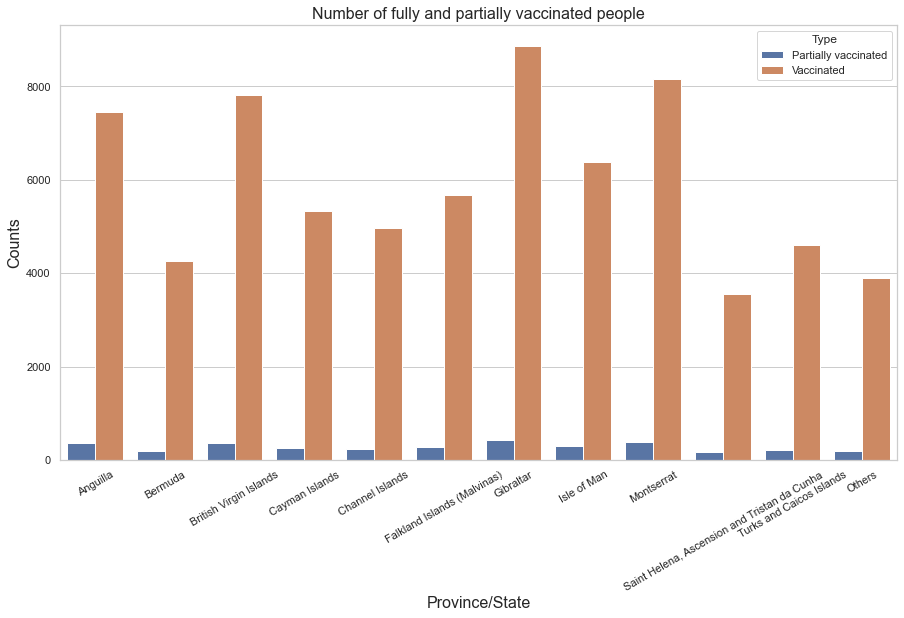

In [55]:
# Visualise partially & fully vaccinated people

# Melt dataframe
da = pd.melt(Vacci_cases, id_vars =['Province/State', 'Country/Region', 'Date'], value_vars =['Partially vaccinated', 'Vaccinated'])
da.rename(columns = {'variable':'Type', 'value':'Count'}, inplace = True)

da.head()

# Set figure size
plt.figure(figsize = (15,8))

# Create barplot
ax = sns.barplot(x='Province/State', y='Count', hue='Type', data=da, ci=None)

# Format axis and lables
ax.set_xticklabels(ax.get_xticklabels( ),rotation = 30)
ax.set_xlabel('Province/State', fontsize = 16)
ax.set_ylabel('Counts', fontsize = 16)
ax.set_title('Number of fully and partially vaccinated people', fontsize = 16)

# Save plot as image
plt.savefig('Number of Fully and Partially vaccinated people.png', dpi=600)



## Assingment activity 3 - plot and analyse the data

### Create charts to show the number of recovered person and dead person

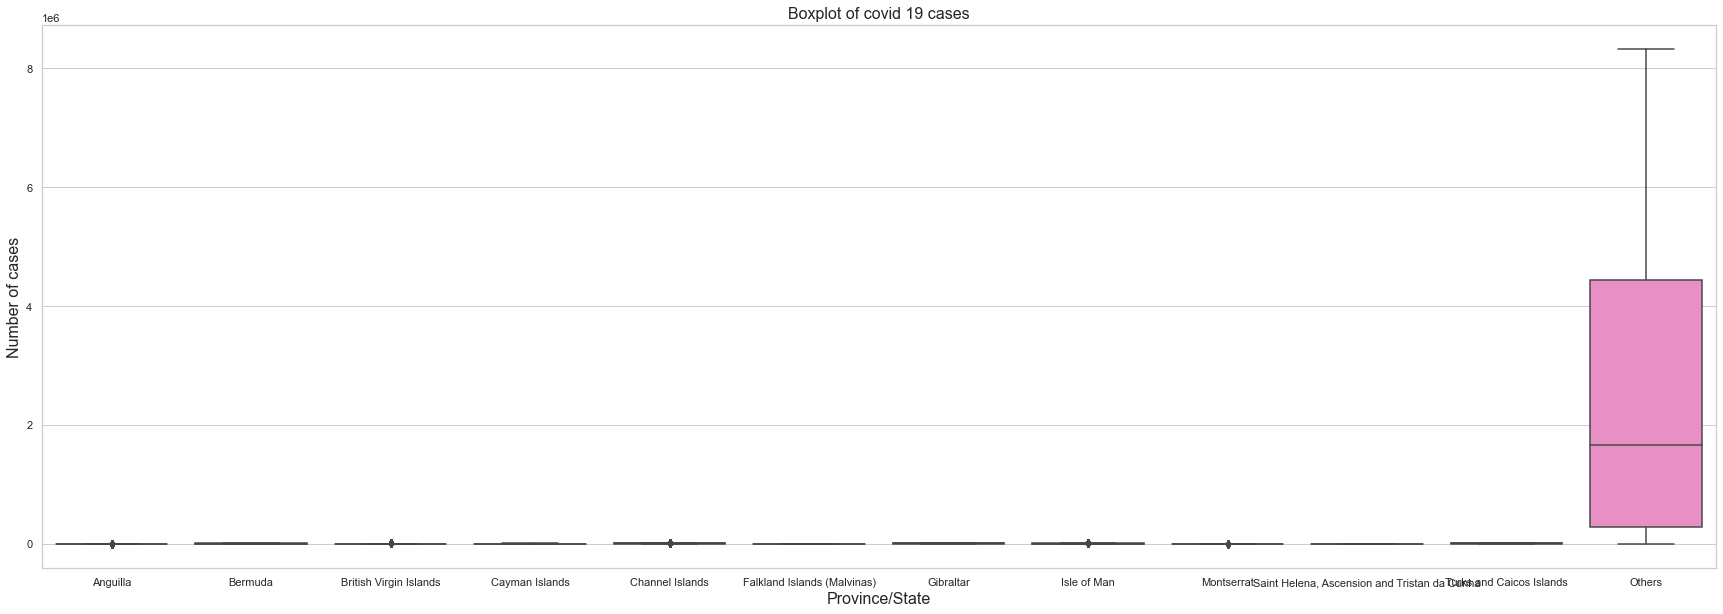

In [66]:
# Identify possible outliers for number of cases

# Set figure dimension
plt.figure(figsize = (30,10))

# Create boxplot
box_plot_cases = sns.boxplot(data = Vacci_cases, x = 'Province/State', y = 'Cases')

# Edit axis and labels
box_plot_cases.set_title('Boxplot of covid 19 cases', fontsize = 16)
box_plot_cases.set_xlabel('Province/State', fontsize = 16)
box_plot_cases.set_ylabel('Number of cases', fontsize = 16)

# Save chart as image
plt.savefig('Boxplot_of_covid19_cases.png', dpi = 600)

#### Observation:
We can see here that the number of cases of covid-19 is unusually high (millions!) for the "Others" region.
Thus, these should not be taken into account when trying to compare the number of covid-19 cases for other provinces and states.

Text(0, 0.5, 'Number of cases')

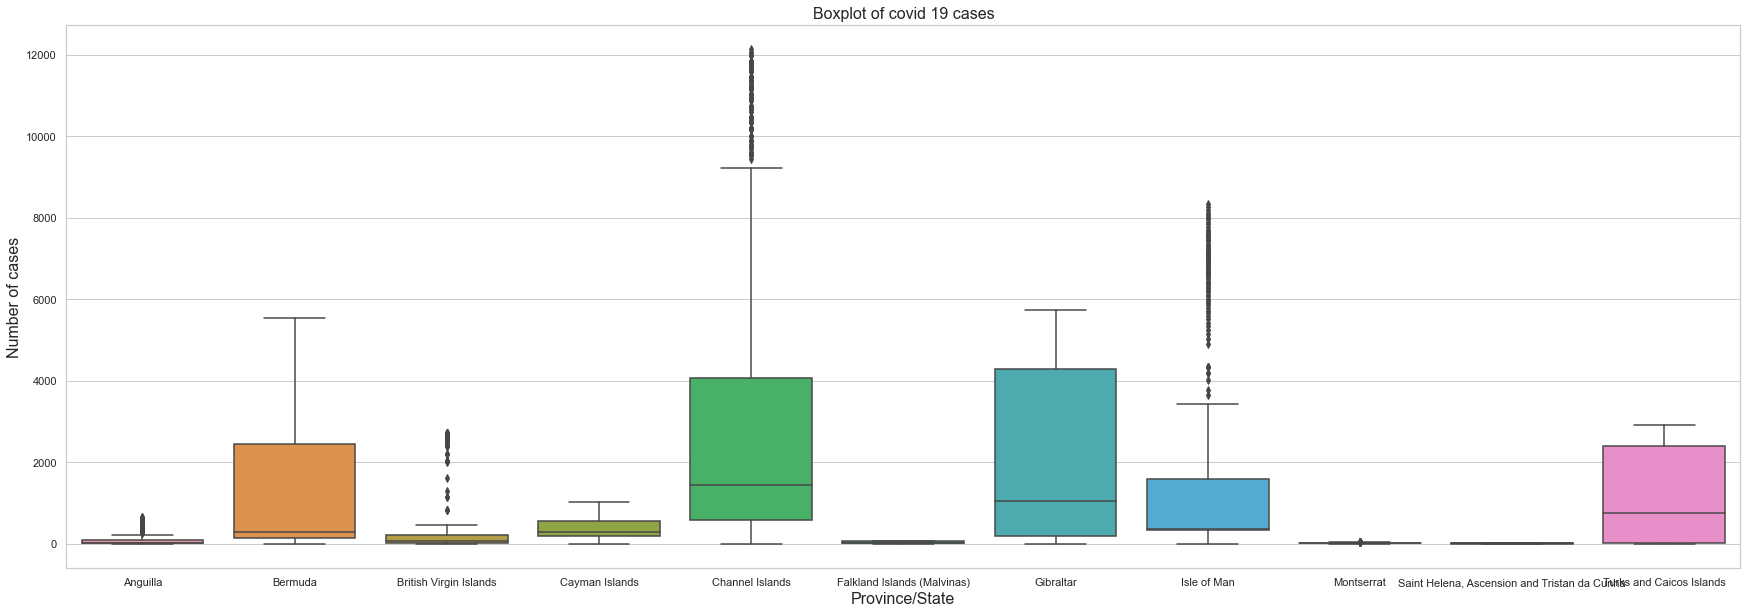

In [76]:
# Sub dataframe without "Others"

Vacci_cases_no_others = Vacci_cases[Vacci_cases['Province/State'] != 'Others']


Vacci_cases.head()

# Set plot dimensions
plt.figure(figsize = (30,10))

# Create boxplot
box_plot_cases = sns.boxplot(data = Vacci_cases_no_others, x = 'Province/State', y = 'Cases')

# Edit axis and labels
box_plot_cases.set_title('Boxplot of covid 19 cases', fontsize = 16)
box_plot_cases.set_xlabel('Province/State', fontsize = 16)
box_plot_cases.set_ylabel('Number of cases', fontsize = 16)


#### Observation:

When removing the others from the dataset we can better see the spread of the data. 
Anguilla, British Virgin Islands, Channel Islands and Isle of Man do display some outliers. 

However, these numbers are still acceptable as shown in the time series below.

Text(0, 0.5, 'Number of cases')

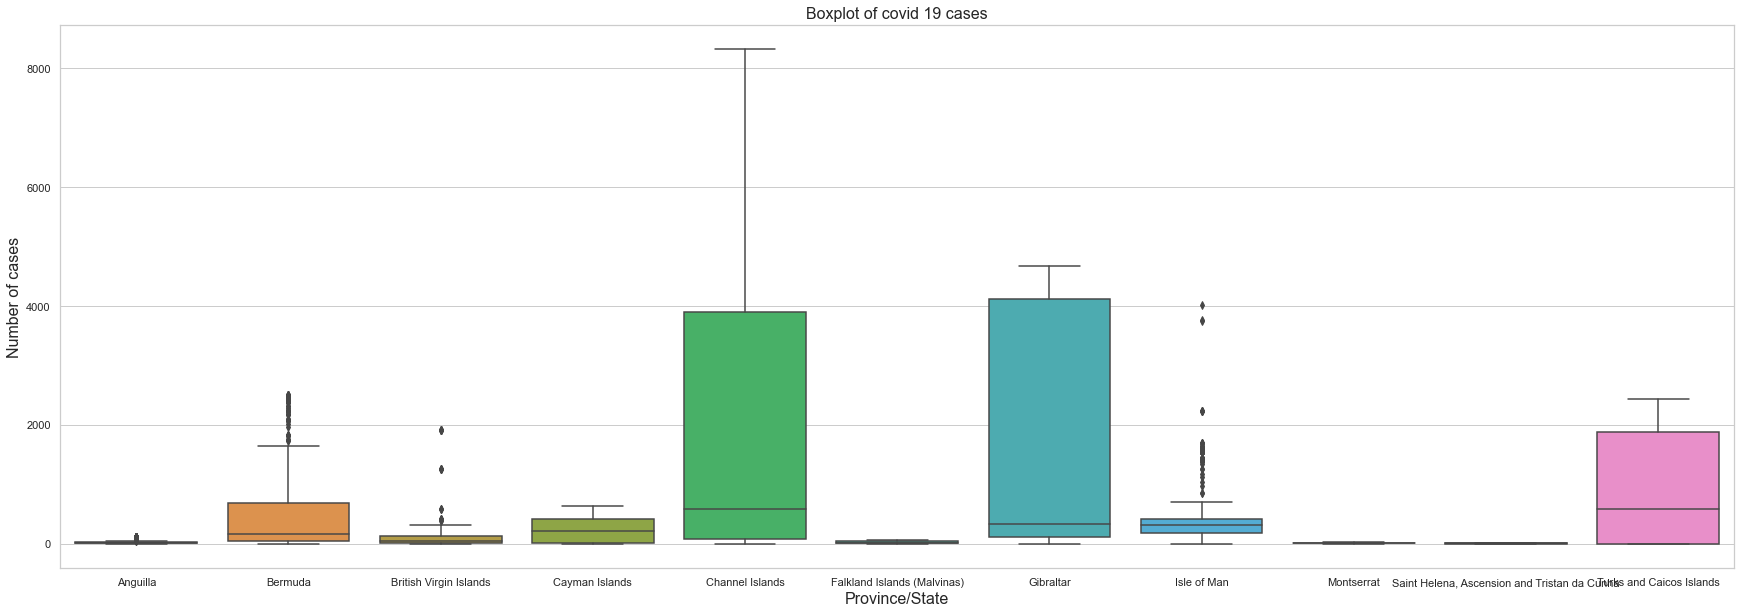

In [85]:
# Boxplot of recovered cases

# Sub dataframe without others

plt.figure(figsize = (30,10))
box_plot_cases = sns.boxplot(data = Vacci_cases_no_others, x = 'Province/State', y = 'Recovered')
box_plot_cases.set_title('Boxplot of covid 19 cases', fontsize = 16)
box_plot_cases.set_xlabel('Province/State', fontsize = 16)
box_plot_cases.set_ylabel('Number of cases', fontsize = 16)



#### Observation

We can see the spread of numbers of covid-19 recovered cases for each province/state.
(Without taking into account the "Others" province/state).

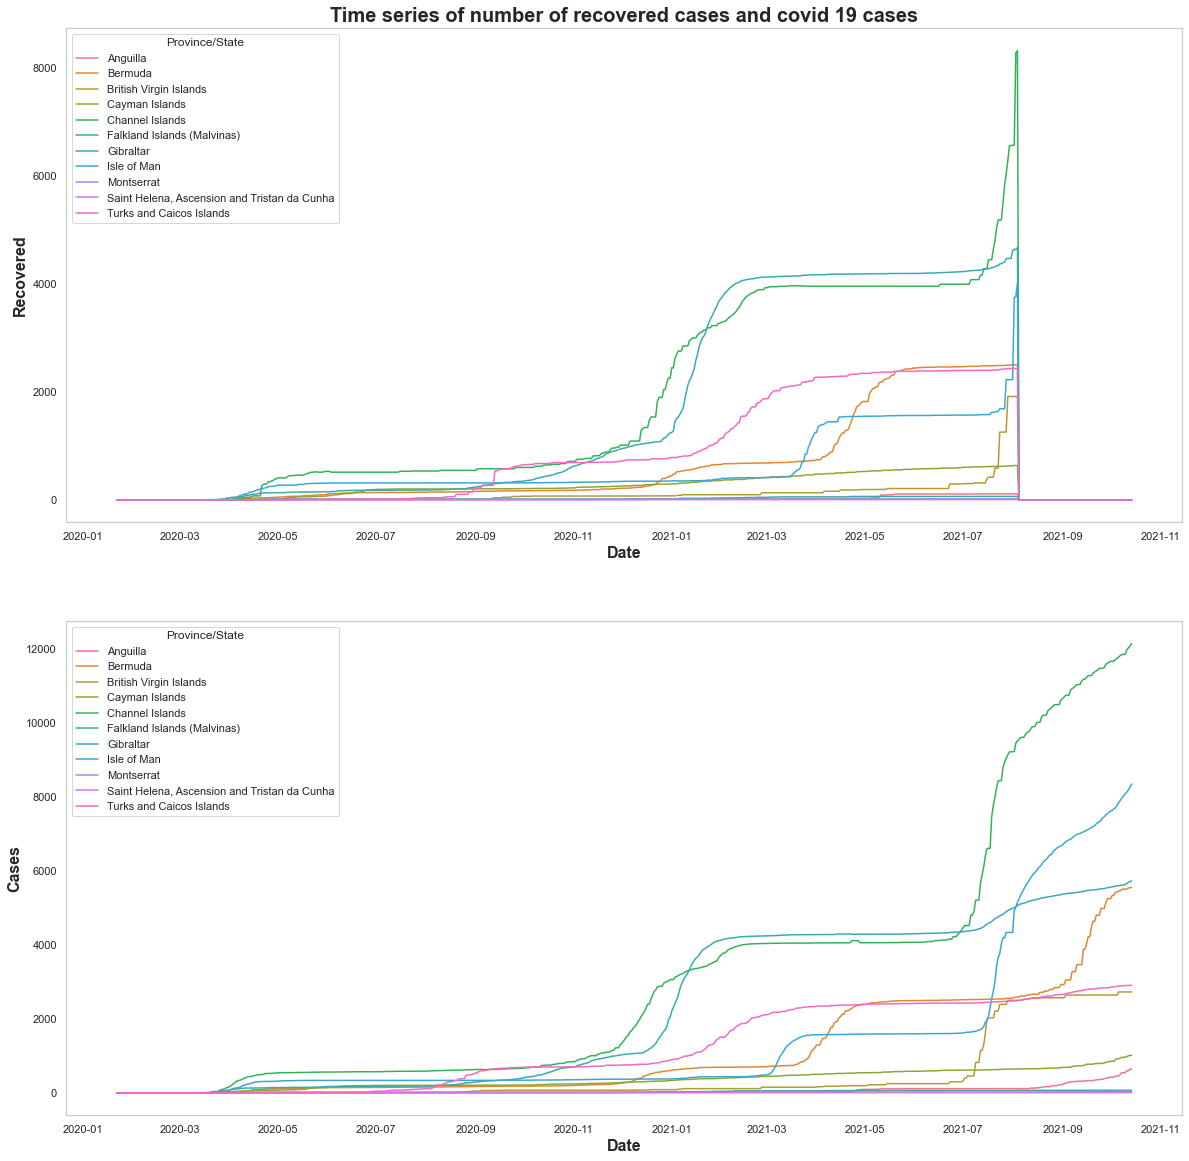

In [84]:
# Time series of infected and recovered cases

# Set figure dimensions
fig, axe = plt.subplots(nrows = 2, figsize = (20,20))

# Save lineplots as variables
c = sns.lineplot(data = Vacci_cases_no_others, x = 'Date', y = 'Recovered', hue = 'Province/State', ax=axe[0])
d = sns.lineplot(data = Vacci_cases_no_others, x = 'Date', y = 'Cases', hue = 'Province/State', ax=axe[1])

# Edit axis and labels
c.set_xlabel('Date', fontsize=16, fontweight = 'bold')
c.set_ylabel('Recovered', fontsize=16, fontweight = 'bold')
d.set_xlabel('Date', fontsize=16, fontweight = 'bold')
d.set_ylabel('Cases', fontsize=16, fontweight = 'bold')
c.grid(visible = None)
d.grid(visible = None)
c.set_title('Time series of number of recovered cases and covid 19 cases', fontsize=20, fontweight = 'bold')

# Save charts as image
plt.savefig('number_cases_and_recovered_cases.png', dpi=600)


#### Observation:
The top charts shows the number of recovered cases. 
Bottom charts the number of infected cases. 

Both display and increasing trend. A rise followed by a plateu and then a second rise. 
This can be interpreted as "Covid waves" where during certain period of time the number of infection increases rapidly and then stagnates (possibly due to counter measures such as lockdowns or working from home policies).

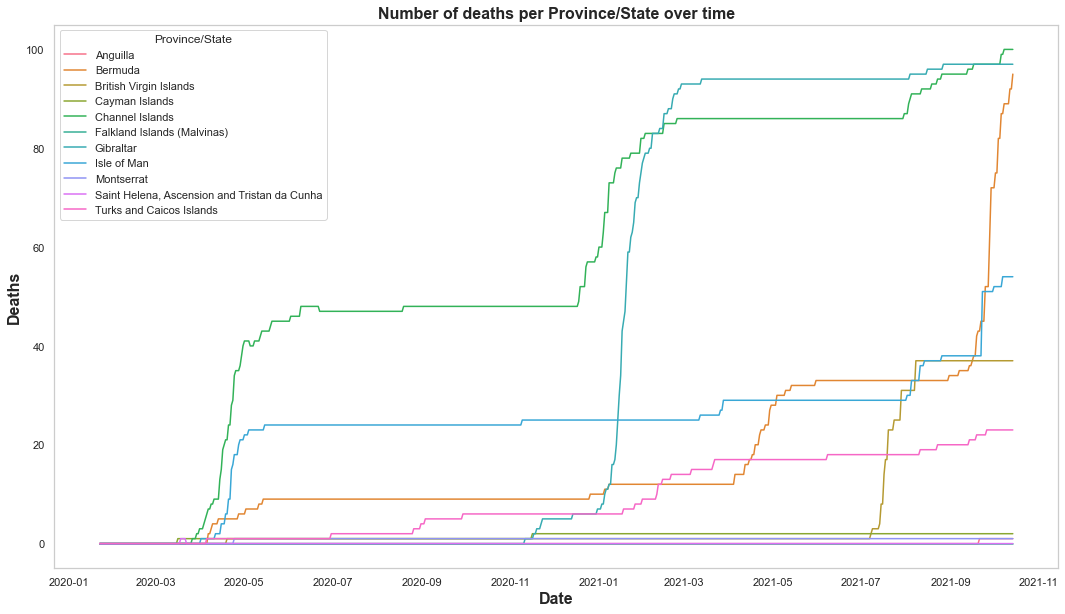

In [139]:
# Plot number of deaths

# Set figure dimensions
plt.figure(figsize = (18,10))

# Create lineplot
e = sns.lineplot(data = Vacci_cases_no_others, x = 'Date', y = 'Deaths', hue = 'Province/State')

# Edit axis and labels
e.set_xlabel('Date', fontsize=16, fontweight = 'bold')
e.set_ylabel('Deaths', fontsize=16, fontweight = 'bold')
e.set_title('Number of deaths per Province/State over time', fontsize = 16, fontweight = 'bold')
e.grid(visible = None)

# Save chart as image
plt.savefig('Number_of_covid_deaths.png', dpi = 600)

#### Observation: 
The "Others" category has been removed because the numbers displayed were in the thousands, 
therefore truncating the data sets and hiding values for other regions. 

The number of deaths follows a similar pattern as the infection and recoveries time series. 
It can be seen that the number of deaths has not decreased for most province/state.

## Assignment activity 4 - analyse Twitter data

In [92]:
# Import the tweets data

tweets = pd.read_csv('tweets.csv')

print(tweets.shape)

print(tweets.dtypes)

tweets.tail()


(3960, 21)
created_at                    object
id                           float64
id_str                       float64
text                          object
truncated                     object
source                        object
in_reply_to_status_id        float64
in_reply_to_status_id_str    float64
in_reply_to_user_id          float64
in_reply_to_user_id_str      float64
in_reply_to_screen_name      float64
contributors                 float64
is_quote_status               object
retweet_count                  int64
favorite_count                 int64
favorited                     object
retweeted                     object
lang                          object
possibly_sensitive            object
quoted_status_id             float64
quoted_status_id_str         float64
dtype: object


,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str
3955,19/05/2022,1.527280e+18,1.527280e+18,NORTHERN IRELAND. Announced on THURSDAY.\n\nC...,False,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,NaN,NaN,...,NaN,False,0,1,False,False,en,False,NaN,NaN
3956,18/05/2022,1.526910e+18,1.526910e+18,NORTHERN IRELAND. Announced on WEDNESDAY.\n\n...,False,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
3957,17/05/2022,1.526550e+18,1.526550e+18,NORTHERN IRELAND. Announced on TUESDAY.\n\nCO...,False,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
3958,16/05/2022,1.526190e+18,1.526190e+18,NORTHERN IRELAND. Announced on MONDAY.\n\nCOV...,False,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,NaN,NaN,...,NaN,False,0,1,False,False,en,False,NaN,NaN
3959,15/05/2022,1.525900e+18,1.525900e+18,NORTHERN IRELAND. \n\nNI #COVID19 data has ...,False,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,NaN,NaN,...,NaN,False,1,0,False,False,en,False,NaN,NaN


In [97]:
# Change data type of text

tweets['text'] = tweets['text'].astype(str)


tweets.head()

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str
0,23/05/2022,1.528750e+18,1.528750e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
1,23/05/2022,1.528720e+18,1.528720e+18,#COVID19 is linked to more #diabetes diagnoses...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,...,NaN,False,0,1,False,False,en,False,NaN,NaN
2,23/05/2022,1.528650e+18,1.528650e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
3,23/05/2022,1.528610e+18,1.528610e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
4,23/05/2022,1.528600e+18,1.528600e+18,Advanced healthcare at your fingertips\nhttps:...,False,"<a href=""https://about.twitter.com/products/tw...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN


In [101]:
# Strip the data

tweets_text = tweets[['text']]


tweets_text.head()

print(tweets_text.dtypes)


# Apply lambda function to strip data in each rown
tweets_text = tweets_text['text'].apply(lambda x:
                                       x if x.strip() != None else None)



text    object
dtype: object


In [103]:
# Loop through the messages to create values containing tags

tags = []

for y in [x.split(' ') for x in tweets_text.values]:
    for z in y:
        if '#' in z:
            tags.append(z)

            
# Create series containing count values

tags= pd.Series(tags).value_counts()

print(tags.shape)

(4776,)


In [76]:
# Display the series

tags.head(30)

#COVID19                1632
#CovidIsNotOver          472
#China                   262
#covid19                 176
#Covid19                 148
#COVID                   108
#covid                   104
#Greece                  103
#coronavirus             100
#PeoplesVaccine.          84
#CoronaUpdate             84
#Omicron                  83
#COVID2020                82
#covid19uk                80
#CoronavirusOutbreak      80
#COVID19Pandemic          80
#monkeypox                77
#globalhealth             76
#publichealth             72
#healthtech               69
#COVID2019                69
#datascience              66
#data                     66
#analytics                64
#Shanghai                 63
#Covid_19                 63
#datavisualization        63
#pandemic                 60
#Athens                   55
#Beijing                  50
dtype: int64

In [100]:
# Create a dataframe containing the series
tags_data = pd.DataFrame(tags).reset_index()

# Set column names
tags_data.columns = ['word','count']

# Convert the data type to integer
tags_data['count'] = tags_data['count'].astype(int)

# Preview the data
print(tags_data.shape)
print(tags_data.dtypes)

tags_data.head(15)


(4776, 2)
word     object
count     int64
dtype: object


,word,count
0,#COVID19,1632
1,#CovidIsNotOver,472
2,#China,262
3,#covid19,176
4,#Covid19,148
5,#COVID,108
6,#covid,104
7,#Greece,103
8,#coronavirus,100
9,#PeoplesVaccine.,84


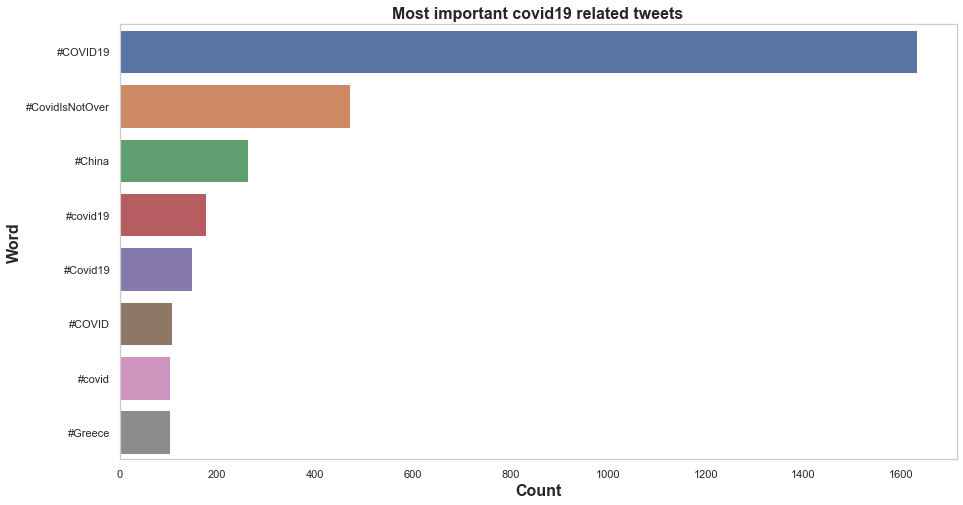

In [105]:
# Display the most important tweets

# Set figure dimensions
plt.figure(figsize = (15,8))

# Create barplot
f = sns.barplot(x = 'count', y ='word', data = tags_data.loc[(tags_data['count'] >100)])

# Edit axis and labels
f.set_xlabel('Count', fontsize=16, fontweight = 'bold')
f.set_ylabel('Word', fontsize=16, fontweight = 'bold')
f.set_title('Most important covid19 related tweets', fontsize = 16, fontweight = 'bold')
f.grid(visible = None)


# Save figure as image
plt.savefig('covid_tweets.png', dpi =900)


#### Observation:
Most important tweets from tweeter data contain only general covid-19 information.
Nothing related to specific province/states of interest.

## Assignment activity 5 - Time series of hospitalisation number

In [137]:
# Libraries and settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load and select relevant subset of the data
ds1 = pd.read_csv('covid_19_uk_cases.csv')
ds2 = pd.read_csv('covid_19_uk_vaccinated.csv')

sample = ds1[['Province/State','Date','Hospitalised']]



In [108]:
# Select data for a specific province
sample_ci = sample[sample['Province/State'] == "Channel Islands"]

# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values

        
    # Calculate the mean absolute square 
    mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
    # Calculate the standard deviation using numpy's std function
    deviation = np.std(series[window:] - rolling_mean[window:])
        
    # Calculate the upper and lower bounds 
    lower_bound = rolling_mean - (mae + scale * deviation)
    upper_bound = rolling_mean + (mae + scale * deviation)
        
    # Name and style upper and lower bound lines and labels 
    plt.plot(upper_bound, 'r--', label='Upper bound/ Lowe Bound')
    plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc = 'best')
    plt.grid(True)



In [109]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)



### Question 1:

The consultant indicated that the function is functional, but did not demonstrate how to use it.
Use the provided function, `plot_moving_average()`, 
to plot the data for the selected province (variable name is `sample_ci` and set the window parameter to 7 days. 




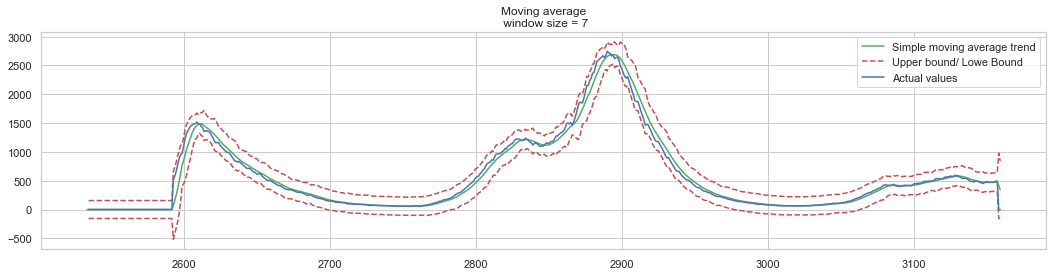

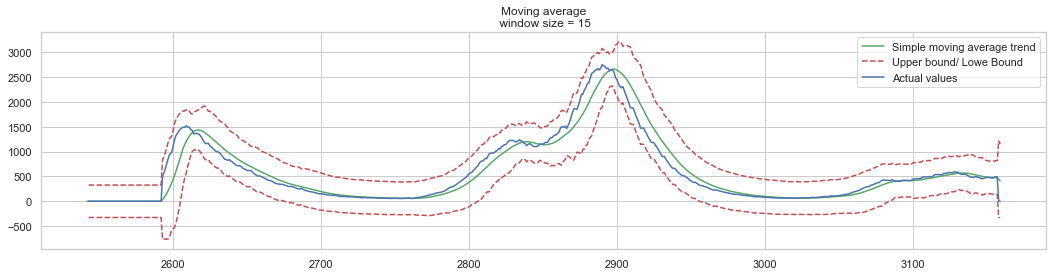

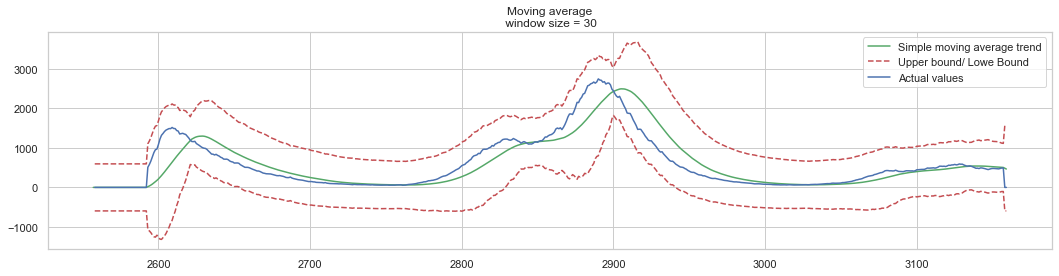

In [122]:
# Demonstrate the use of the function to plot moving averages
plot_moving_average(sample_ci.Hospitalised, 7, plot_intervals = False, scale = 1.96)

# Demonstrate the use of the function to plot moving averages for 15 days
plot_moving_average(sample_ci.Hospitalised, 15, plot_intervals = False, scale = 1.96)

# Demonstrate the use of the function to plot moving average for 30 days
plot_moving_average(sample_ci.Hospitalised, 30, plot_intervals = False, scale = 1.96)

# Save plot as image (can only save one at a time)
plt.savefig('hospitalise_moving_average_30.png', dpi = 900)

### Question 2:

The consultant performed a calculation that looks interesting, 
but the team is unsure about what the intention was and how to interpret the output. 
Can you offer some insights into the meaning of the code and output in the cell below? Is it useful?





In [112]:
# Return the top three days with biggest difference between daily value and rolling 7-day mean
s = sample_ci.copy()
s_rolling = s['Hospitalised'].rolling(window=7).mean()
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])
s.sort_values('error', ascending=True).head(3)




,Province/State,Date,Hospitalised,error
2535,Channel Islands,2020-01-29,0.0,0.0
2567,Channel Islands,2020-03-01,0.0,0.0
2568,Channel Islands,2020-03-02,0.0,0.0


Question 2 insights: 

The code above first creates a copy of the dataframe of the hospitalisation sample generated above. 

It then creates a second variable named "s_rolling", and applies the rolling method to the variable "s".

The rolling method provides a rolling windown calculation for a specified period of time k. 

In this case we use a rolling window of 7 days and calculated the mean value or the "7 day" moving average value,

of hospitalised cases.


Thirdly, we create a thrid collumn named "error". We calculate the mean absolute error (MAE).

MAE helps us to calculate the difference between our predicted values and our observed values. 
In the case study above, we calculate the difference bwetween our "obseverd weekly hospitalised cases" and the "predicted hospitalised cases".


Lastly, we sort the values in a descending order.


Why is MAE important? 

MAE is one way to describe the variation in a data set. It enables us to understand how spread out the values in the data set are. 

In this case the largest MAE is 436.3 from the mean and the lowest MAE is 0. 


It is possible to display the discrepencies between the observed and the predicted values using a scatter plot. 
This is shown in the figure below.


The scatter plot dislays the predicted and observed values, fitted with a regression line and a 95% confidence interval. 
It can be seen that the predicted values increase in spread for hihger number of hospitlaised cases predicted. Whereas for lower number of hospitlaised cases the predicted values are closer to the observed values. 

Thus, the predictive model has a higher accuracy for a lower number of hospitalised cases, and starts to deviate when the number of hospitalised cases is higher than 1500.



<AxesSubplot:xlabel='Predicted hospitalised', ylabel='Observed hospitalised'>

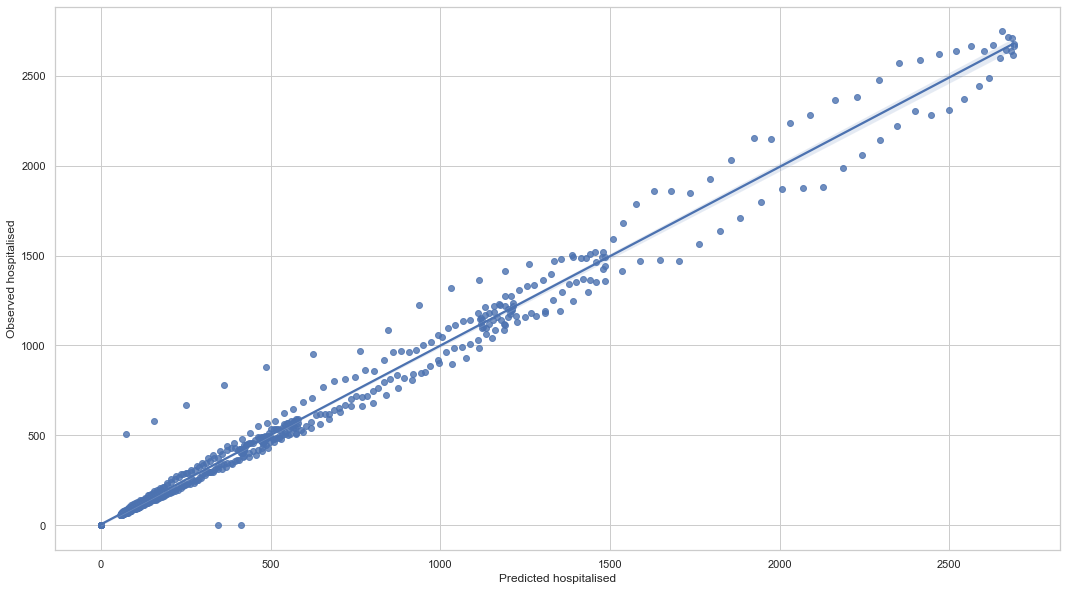

In [113]:
# Create new data frame

hospitalised = pd.Series(s['Hospitalised'][7:])

predicted =  pd.Series(s_rolling[7:])


reg_hosp = pd.DataFrame(columns = ['Observed hospitalised', 'Predicted hospitalised'])

reg_hosp['Observed hospitalised'] = hospitalised

reg_hosp['Predicted hospitalised'] = predicted

reg_hosp.head()



plt.figure(figsize = (18,10))

sns.regplot(data = reg_hosp, x = 'Predicted hospitalised', y = 'Observed hospitalised', ci = 95)



#### Observation: 
We plot a regression line between the predicted and observed number of people in hospital (for a 7 day moving average). We can see that for values from 0-600 our predicted values closely match the observed values. 

However, as the number increase, the predicted values start to deviate from the observed values. This clearly seen for values greate than 1500.

### Question 3:

The management team had some additional questions around the project where they asked for further feedback to be included in your final presentation. Make sure to answer the questions in the Notebook in Markdown format in preparation for your presentation. The expectation is that you will provide short and direct responses to help them understand the importance and impact of the questions below.

> ***Note:*** You can double-click on the markdown cells to edit the text.

#### Question 3.1 (double click cell to edit)
- What is the difference between qualitative and quantitative data? How can these be used in business predictions?


Quantitative data can be measured an counted. They help the business in answering questions that start with "how many, how much, how often...". Quantitiatve data are collected through measurement and counting things. Quantitave data can be analysed through statistcal methods. 

On the other hand qualitative data refer to descriptive data, that are related to words and languages. Thus, qualitative research aims to analyse experiences, behaviours and relations without the use of statistics/mathematics and the processing of numerical information (Basias & Pollalis, 2018). 
Qualitative reasearch helps business answer qustions that start with "what, how, when, where".


Qualitative forecasting can be used when there are insufficient historic data to make any robust statistical observations. Qualitiative forecasting would be based on the opinion of customers and experts. An example of qualitiave forecasting is "market research". It uses customer polling to obtain information on the opinions and preferences of custormers about services and products. 
Qualitative forecasign can only be used to forecast in the short term.


Quantitative forecasting works when there are sufficient historic data available, and upon which statistical methods can be applied to aim to predict future trends and patters. Quantitative methods involve learning patterns from data to help us better understand how a process works, or to predict future events. It includes in-house data (sales numbers) and professionally gathered data (census statistics).
Quantitative forecasting methods can be further divided into causal, correlational or observational, and time-series methods. We’ll briefly touch on multivariate forecasting and then take a closer look at time-series forecasting. But before getting into the details let’s look at the nuances of methods and models.

Basias, N. & Pollalis, Y (2018) Quantitative and Qualitative Research in Business & Technology: Justifying a Suitable Research Methodology https://sibresearch.org/uploads/3/4/0/9/34097180/riber_7-s1_sp_h17-083_91-105.pdf


#### Question 3.2 (double click cell to edit)
- Can you provide you observations around why continuous improvement is required, can we not just implement the project and move on to other pressing matters?

Continuous improvement is a much larger concept in which processes are improved, quality is increased, and wasted time and effort are reduced through specific processes and practices. This is a core principle for a learning organisation. 

Coninous improvement can be broken down into four steps:
.plan
.do
.check
.act
The checking stage is crucial after the project has been implemented. As it allows to monitor and review the performance against the objectives and targets set in the planning stage.

Thus for a business to pursue continual improvement it should focus on: 
It's customers ('customer centricity'). Is the customer happy with the product and services? if not whant can be done to improve their satisfaction. 
It's quality of product and process efficiency of creating and delivering these products. 
And lastly its profitability.



#### Question 3.3 (double click cell to edit)
- As a government, we adhere to all data protection requirements and have good governance in place. Does that mean we can ignore data ethics? We only work with aggregated data and therefore will not expose any personal details? (Provide an example of how data ethics could apply to this case; two or three sentences max)

Data ehtics also applies to the collection process covid related data. For instance, the government should disclose how it is collecting the data (e.g., digital proximity tracking tool) and what will the specific use of this data. Because, there is a blurry line between the disease surveillance and population surveillance (WHO, 2020).



/var/folders/mx/mpfmf2l110d7s_s_0sbc7x0r0000gn/T/ipykernel_35326/1447212792.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_2['Date'] = pd.to_datetime(sample_2['Date'])


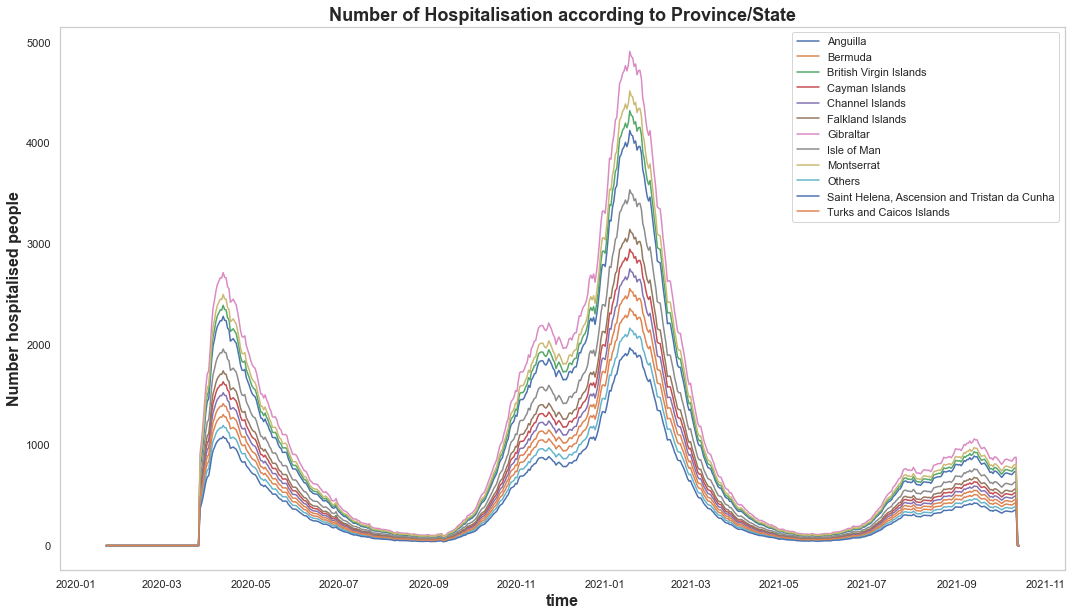

<Figure size 432x288 with 0 Axes>

In [135]:
## Addtional study - people being hospitalised 

# Create anew data frame, change the date datatype, and change the dataframe index
sample_2 = sample

# Change data type
sample_2['Date'] = pd.to_datetime(sample_2['Date'])

sample_2.dtypes


# Set date as index
sample_2.set_index('Date', inplace = True)

sample_2.head()

# Resample data on Monthly basis
sample_2.resample('M')


# Create sub data frame for each region
sample_2_Channel_islands = sample_2[sample_2['Province/State'] == "Channel Islands"]
sample_2_Anguilla = sample_2[sample_2['Province/State'] == "Anguilla"]
sample_2_Bermuda = sample_2[sample_2['Province/State'] == "Bermuda"]
sample_2_BV_islands = sample_2[sample_2['Province/State'] == "British Virgin Islands"]
sample_2_Cayman_islands = sample_2[sample_2['Province/State'] == "Cayman Islands"]
sample_2_Falklands_islands = sample_2[sample_2['Province/State'] == "Falkland Islands (Malvinas)"]
sample_2_Gibraltar = sample_2[sample_2['Province/State'] == "Gibraltar"]
sample_2_Isle_of_Man = sample_2[sample_2['Province/State'] == "Isle of Man"]
sample_2_Montserrat = sample_2[sample_2['Province/State'] == "Montserrat"]
sample_2_Saint_Helena = sample_2[sample_2['Province/State'] == "Saint Helena, Ascension and Tristan da Cunha"]
sample_2_Turks_Caicos = sample_2[sample_2['Province/State'] == "Turks and Caicos Islands"]
sample_2_Others = sample_2[sample_2['Province/State'] == "Others"]


# Create line plot hospitalisation
plt.figure(figsize = (18,10))


plt.plot(sample_2_Anguilla['Hospitalised'], label = 'Anguilla')
plt.plot(sample_2_Bermuda['Hospitalised'], label = 'Bermuda')
plt.plot(sample_2_BV_islands['Hospitalised'], label = 'British Virgin Islands')
plt.plot(sample_2_Cayman_islands['Hospitalised'], label = 'Cayman Islands')
plt.plot(sample_2_Channel_islands['Hospitalised'], label = 'Channel Islands')
plt.plot(sample_2_Falklands_islands['Hospitalised'], label = 'Falkland Islands')
plt.plot(sample_2_Gibraltar['Hospitalised'], label = 'Gibraltar')
plt.plot(sample_2_Isle_of_Man['Hospitalised'], label = 'Isle of Man')
plt.plot(sample_2_Montserrat['Hospitalised'], label = 'Montserrat')
plt.plot(sample_2_Others['Hospitalised'], label = 'Others')
plt.plot(sample_2_Saint_Helena['Hospitalised'], label = 'Saint Helena, Ascension and Tristan da Cunha')
plt.plot(sample_2_Turks_Caicos['Hospitalised'], label = 'Turks and Caicos Islands')

plt.title('Number of Hospitalisation according to Province/State', fontsize = 18, fontweight = 'bold')
plt.xlabel('time', fontsize = 16, fontweight = 'bold')
plt.ylabel('Number hospitalised people', fontsize = 16, fontweight = 'bold')
plt.grid(visible = None)
plt.legend()
plt.show()

# Can't save the figure 
plt.savefig('Number_hospitalisation.png', dpi = 900)


# Prompt of error because a value is tring to be set on a copy of a slice from a DataFrame.
# Can be overcome by reloading the orginal data in line 137.



